# HOOMD Example 1 (Energy minimization)

In [3]:
import hoomd
from hoomd import md

In [4]:
hoomd.context.initialize("");

HOOMD-blue v2.3.5 DOUBLE HPMC_MIXED MPI TBB SSE SSE2 
Compiled: 10/11/2018
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
notice(2): Setting number of TBB threads to value of OMP_NUM_THREADS=1


In [5]:
hoomd.init.create_lattice(unitcell=hoomd.lattice.sc(a=2.0),n=5);

notice(2): Group "all" created containing 125 particles


In [6]:
nl=hoomd.md.nlist.cell();

In [7]:
lj=hoomd.md.pair.lj(r_cut=2.5,nlist=nl);

In [8]:
lj.pair_coeff.set('A','A',epsilon=1.0,sigma=1.0);

In [9]:
hoomd.md.integrate.mode_standard(dt=0.005);

In [10]:
all=hoomd.group.all();
hoomd.md.integrate.langevin(group=all,kT=0.2,seed=42);

notice(2): integrate.langevin/bd is using specified gamma values


In [11]:
hoomd.analyze.log(filename="log.output.log",quantities=['potential_energy','temperature'],period=100,overwrite=True);

In [12]:
hoomd.dump.gsd("trajectory.gsd",period=2e3,group=all,overwrite=True);

In [13]:
hoomd.run(1e4);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 125
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:23 | Step 10000 / 10000 | TPS 2201.19 | ETA 00:00:00
Average TPS: 2197.24
---------
-- Neighborlist stats:
321 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 68 / n_neigh_avg: 23.512
shortest rebuild period: 17
-- Cell list stats:
Dimension: 3, 3, 3
n_min    : 0 / n_max: 22 / n_avg: 4.62963
** run complete **


In [14]:
import numpy

In [15]:
from matplotlib import pyplot
%matplotlib inline
data=numpy.genfromtxt(fname='log.output.log',skip_header=True);

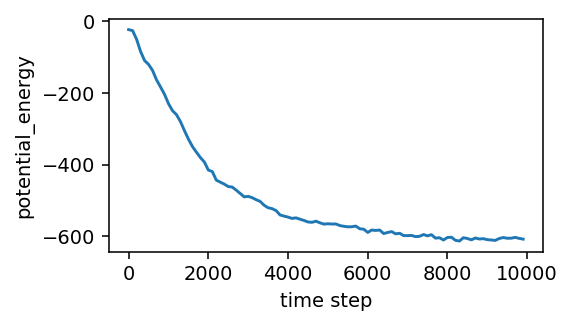

In [16]:
pyplot.figure(figsize=(4,2.2),dpi=140);
pyplot.plot(data[:,0],data[:,1]);
pyplot.xlabel('time step');
pyplot.ylabel('potential_energy');

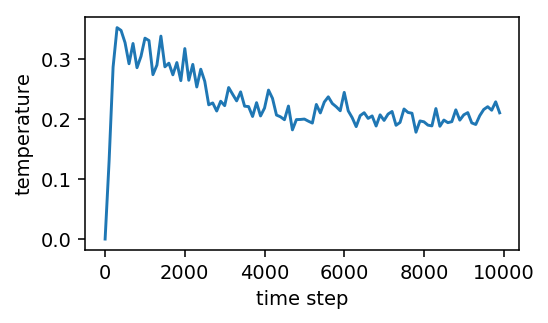

In [17]:
pyplot.figure(figsize=(4,2.2),dpi=140);
pyplot.plot(data[:,0],data[:,2]);
pyplot.xlabel('time step');
pyplot.ylabel('temperature');